# Ad Click Prediction 

Building a simple logistic regression model using the [Ad Click prediction dataset](https://www.kaggle.com/jahnveenarang/cvdcvd-vd).

We will work with some demographic data to predict whether a user purchased something after clicking on an ad or not. We will start off by importing the libraries and datasets.


In [33]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [34]:
#Loading dataset
social_network_ads = pd.read_csv('Social_Network_Ads.csv')

In [35]:
#Displaying the loaded dataframe
social_network_ads

,User ID,Female,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


We notice 5 different columns outlying customer ID, gender, age, estimated salary and whether they purchased a product after clicking on an ad.

'User ID': unique identification for consumer\
'Age': cutomer age in years\
'Estimated Salary': Avg. Income of consumer\
'Female': Whether consumer was male or female\
'Purchased': 0 or 1 indicated clicking on Ad\

### Exploring the dataset


In [36]:
social_network_ads.shape

(400, 5)

We can see that there are 400 rows (data entries) and 5 columns (features). We can also look at the top few entries to get an idea about the data

In [37]:
social_network_ads.head(5)

,User ID,Female,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [38]:
social_network_ads.dtypes

User ID            int64
Female             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

### Visual exploration of the Data


#### Using a Histogram

Histogram refers to the frequency of occurrence of variables in an interval, it is useful to see the different categories of data and how frequently they occur in a column. Next, we will look at the histogram of male and female distribution across the ranges of age. Most people are included between the 20 and 50 year-old bracket.

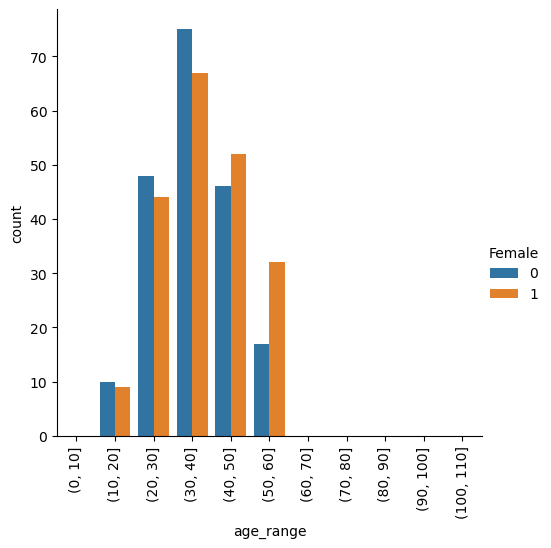

In [39]:
#plot a histogram of count by age_range, with one series per gender
social_network_ads_bins = social_network_ads[social_network_ads.Age.notna()]

bins = list(range(0, 120, 10))
social_network_ads_bins['age_range'] = pd.cut(social_network_ads.Age, bins=bins)
chart = sns.catplot(x="age_range", kind="count", hue="Female", data=social_network_ads_bins);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

We can see that the distribution of data in the dataset is roughly equal. A balanced dataset is the one that contains equal or almost equal number of samples from the positive and negative class. If one of the class outnumbers the other in the dataset, then the distrubtion is known to be skewed - or in favour of one class, as the results will introduce a bias towards that class, which can affect our results and the assumptions we are making.

## Using Sklearn to fit a regression model
We will be using sklearn for fitting the first logistic regression model. We will split our dataframe into the following:
- A single column for the target variable (technically a Series)
- Remaining columns for the inputs (Since there are multiple columns this is a dataframe) 


In [40]:
#Separate x_inputs from y_target variables
y_target = social_network_ads.Purchased
x_inputs = social_network_ads[['Female','Age','EstimatedSalary']]

#### Splitting dataset into Training and Test sets

It is always a good practice in Machine learning to split the dataset into training and test sets to evaluate how well our model does when trained on a set of data (train) and predicting on data it has not seen before (test). 

Finalizing our training data or independent features (X) and also specify our outcome variable (Y). 

In [41]:
#Split the data into training and test sets using the function
x_train, x_test, y_train, y_test = train_test_split(x_inputs, y_target, train_size=0.8)

print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", len(y_train))
print("Y_test:", len(y_test))

X_train: (320, 3)
X_test: (80, 3)
Y_train: 320
Y_test: 80


#### Pre-processing step (Scaling data)

Before we fit the logistic regression, we will scale the data to normalize all the data and it is especially helpful in dataset with variables in different units.


In [42]:
sc_X = StandardScaler()

In [43]:
x_train = sc_X.fit_transform(x_train)

In [44]:
x_test = sc_X.fit_transform(x_test)

#### Fitting the model and evaluating results

We declare the model using LogisticRegression and then fit it to our training dataset and labels.

In [45]:
#Declare a logistic regression classifier
classifier = LogisticRegression(max_iter=1000).fit(x_train, y_train)

We can now predict on the test data to see what the predictions would be like for unseen data by the model.

In [46]:
#Make predictions on test data
pred = classifier.predict(x_train)
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

We can use the score method as a first way of understanding how good our model is. The method works by returning the mean accuracy on the given test.

In [47]:
#Print out score on the train data
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.853125
0.8625


The score here evaluates the performance of the model, by default, the classifier uses Accuracy as the score. We can also use the confusion matrix to better evaluate the model.

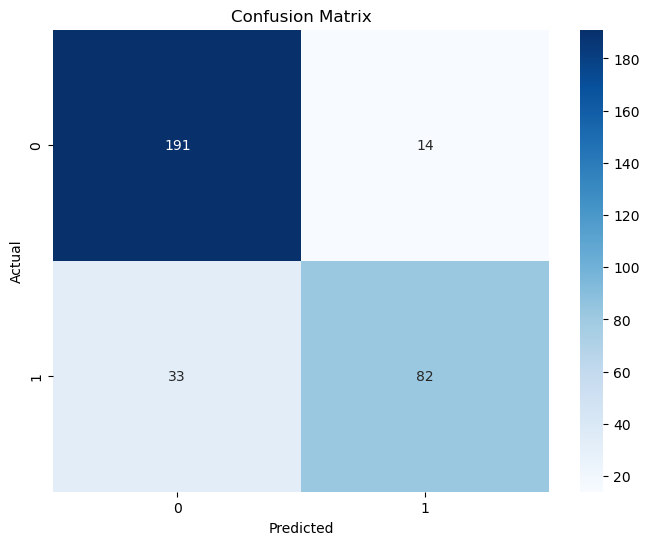

In [48]:
# Generate the confusion matrix
cm = confusion_matrix(y_train, pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Fitting the Linear Regression Model

To fit the model using statsmodels we first separate our target variable (Y) and independent variables (X). As we want to predict the purchase, this is our target variable Y. The rest are our independet variables X. 

## Using Statsmodel
Now, we will have a look at using the Statsmodel library for fitting logistic regression model. We will specify the model and in the next step we will fit the model.

In [49]:
import statsmodels.api as sm

In [50]:
# building the model 
log_reg = sm.Logit(endog = y_target, exog=x_inputs)

# #fitting the data
log_reg = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.677546
         Iterations 4


Now we will print the model results summary. The summary includes information on the fit process as well as the estimated coefficients.

In [51]:
log_reg.summary(xname=['Female', 'Age', 'EstimatedSalary'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                -0.03923
Time:                        12:26:05   Log-Likelihood:                -271.02
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Female             -0.5371      0.201     -2.666      0.008      -0.932      -0.142
Age                -0.0002      0.006     -0.035      0.972      -0.012       0.011
EstimatedSalary  6.209e-07   2.82e-06      0.220      0.826   -4.91e-06    6.15e-06
===================================================================================
"""

We can use the p-value to check the possibility of output predction. Age and Estimated Salary have a very p-value greater than 0.05 meaning they are not statistically significant in helping predict the output variable. But the gender can help in predicting the output variable since the p-value is less than 0.05

#### Log Odds and Interpretation

The Female coefficient (x1) has a coefficient of β=-0.5371 and is statistically significant (p-value of 0.000). We now want to look at the interpretation transforming the coefficients into log odds. We do so by taking the exponential of the parameters. We can remember that Female is our x1 variable.

In [52]:
odds_ratios = pd.DataFrame({"Odds Ratio": log_reg.params})

odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                 Odds Ratio
Female             0.584419
Age                0.999796
EstimatedSalary    1.000001


Taking the exponent of the Female coefficient (-0.5371), we can see that odd ratio is 0.58. We can say that the odds of one gender (male) purchasing the item are just over half compared to females. We can remember that 0 is the encoded label for female and 1 is the encoded label for male.